<a href="https://colab.research.google.com/github/Briana-Sevilla/MAT-421/blob/main/Module_B_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Set 3: Module B**


## Section 17.4: Lagrange Polynomial Interpolation

Unlike linear and cubic interpolation, **lagrange polynomial interpolation** computes a single polynomial that goes through all of our data points. In other words, we do not need a linear or cubic segment for each pair of points; lagrange polynomial interpolation uses one polynomial such that $\ L(x_i)=y_i$ for every point in the data set. A linear combination of **lagrange basis polynomials** can be represented by the following equation:

$\ P_i(x)=\prod_{j=1, j \neq i}^n \frac{x-x_j}{x_i-x_j} $

where:
- $\ n$ is the number of data points
- $\ \prod$ is "the product of". For example, $\ \prod_{i=1}^3 n=1*2*3 = 3!$
- $\ i,j$ are indexes of the inputed data (x-axis). For instance, if we have the following data set: $\ x=[1,2,3]$ and $\ y=[1,5,6]$, then

 $x_1 = 1$ and $x_2=3$.
  - We only have two letters because we want to use 2 different x values at once. Thus, $\ j \neq i$.

Once we calculate our basis polynomials, we can find the lagrange polynomial using the following equation:

$\ L(x)= \sum_{i=1}^n y_i \cdot P_i(x)$

>Note:
- $\ L(x)$ is the sum of these polynomials ($\ P_i(x)$)
- If $\ i=j,$ $\ P(x)$

Lets try to find the lagrange basis polynomials with the data set above:  
$\ x=[1,2,3]$ and $\ y=[1,5,6]$

Equation: $\ P_i(x)=\prod_{j=1, j \neq i}^n \frac{x-x_j}{x_i-x_j}$

So, $n=3, i=1,$ and $\ j$ starts with 2 since $\ j \neq i$

$\ P_1(x)= \frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)} = \frac{(x-2)(x-3)}{(1-2)(1-3)} = \frac{(x-2)(x-3)}{(-1)(-2)} = \frac{1}{2}(x^2-5x+6)$

You continue doing this for $\ P_2(x)$ and $\ P_3(x)$. All you change is the $j$ index!

$\ P_2(x)= \frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)} = \frac{(x-1)(x-3)}{(2-1)(2-3)} = \frac{(x-1)(x-3)}{(1)(-1)} = -1(x^2-4x+3)$

$\ P_3(x)= \frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)} = \frac{(x-1)(x-2)}{(3-1)(3-2)} = \frac{(x-1)(x-2)}{(2)(1)} = \frac{1}{2}(x^2-3x+2)$

Lets plot the lagrange polynomial and see if it goes through all of the points!



In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

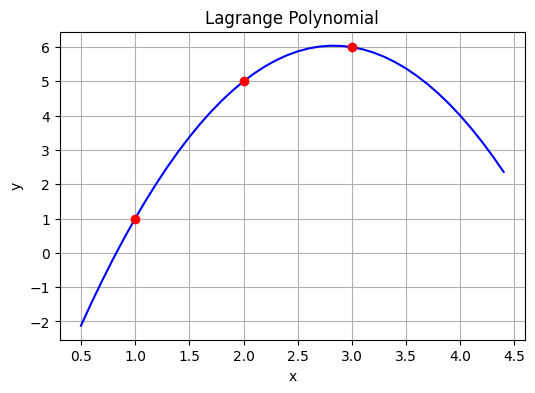

In [ ]:

x = [1, 2, 3]
y = [1, 5, 6]

# coefficients of the lagrange basis polynomials (format for ax^2 + bx + c : [c,b,a])
P1_coeff = [3,-2.5,0.5]
P2_coeff = [-3,4,-1]
P3_coeff = [1,-1.5,0.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(0.5,4.5,0.1)

# plot the lagrange polynomial, the coefficients correspond to the y data set [1,5,6]
L = 1*P1 + 5*P2 + 6*P3

fig = plt.figure(figsize = (6,4))
plt.plot(x_new, L(x_new), 'b')
plt.plot(x, y,'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As you can see, the lagrange polynomial *does* go through all of our data points: (1,1), (2,5), (3,6)!



\\

---

\\

## Section 17.5: Newton’s Polynomial Interpolation

Another way to have one polynomial go through all of the set of data points is by using **Newton's polynomial interpolation**. This type of interpolation can be represented by the following expression for a $\ n-1$ order Newton's polynomial:

$\ f(x)=a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + ... + a_n(x-x_0)(x-x_1)...(x-x_n)$

$\ = ∑_{i=0}^n a_in_i(x)$

where:
- $\ n$ is the number of data points in our set
- $\ n_i(x)=∏_{j=0}^{i-1}(x-x_j)$
- $\ a$ is a coefficient that can be found calculating the divided differences.

Since Newton's polynomial goes through every data point, $\ f(x_i)=y_i$. So, if

$\ f(x_0)=a_0=y_0$, and

$\ f(x_1)=a_0 + a_1(x_1-x_0)=y_1$, then

$\ a_1 = \frac{y_1-y_0}{x_1-x_0}$ and

$\ a_2= \frac{ \frac{y_2-y_1}{x_2-x_1} - \frac{y_1-y_0}{x_1-x_0} }{x_2-x_0}$

and so on until we have repeated this process a total of $\ n$ times (this is called divided differences). In addition, if we make

$\ a_1=f[x_1,x_0]= \frac{y_1-y_0}{x_1-x_0}$, then

$\ a_2=f[x_2,x_1,x_0]= \frac{ \frac{y_2-y_1}{x_2-x_1} - \frac{y_1-y_0}{x_1-x_0}}{x_2-x_0} = \frac{f[x_2,x_1]-f[x_1,x_0]}{x_2-x_0}$

In short,

$\ f[x_k,x_{k-1},..,x_1,x_0]= \frac{f[x_k,x_{k-1},...,x_2,x_1]-f[x_{k-1}x_{k-2},...,x_1,x_0]}{x_k-x_0}$

The coefficients calculated above can be written in the form of a diagonal matrix. Below is an example using 5 data points:

\
\begin{matrix}
y_0 & f[x_1,x_0] & f[x_2,x_1,x_0] & f[x_3,x_2,x_1,x_0] & f[x_4,x_3,x_2,x_1,x_0] \\
y_1 & f[x_2,x_1] & f[x_3,x_2,x_1] & f[x_4,x_3,x_2,x_1] & 0 \\
y_2 & f[x_3,x_2] & f[x_4,x_3,x_2] & 0 & 0 \\
y_3 & f[x_4,x_3] & 0 & 0 & 0 \\
y_4 & 0 & 0 & 0 & 0 \\
\end{matrix}

\

Lets now try to calculate the divided differences table for the following data set:
$\ x=[-2,-1,0,1],$ $\ y=[7,0,4,9]$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def divided_diff(x, y):

    # function to calculate the divided differences table

    n=len(y)
    coef = np.zeros([n,n])
    # y is the first column. Note: [rows,columns]
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
          coef[i][j] = \
         (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

def newton_poly(coef, x_data, x):

   # Evaluate the newton polynomial at x
   n = len(x_data) - 1
   p = coef[n]
   for k in range(1,n+1):
       p = coef[n-k] + (x -x_data[n-k])*p
   return p


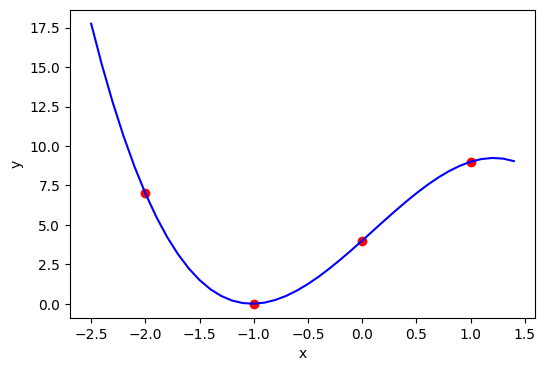

In [ ]:
# Insert data set
x = np.array([-2,-1,0,1])
y = np.array([7,0,4,9])
# Compute the divided difference coefficients
dd_coef = divided_diff(x,y)[0,:]

# Evaluate on our data set
x_new = np.arange(-2.5,1.5,0.1)
y_new = newton_poly(dd_coef,x,x_new)

# Plot the Newton polynomial
plt.figure(figsize = (6,4))
plt.plot(x,y,'ro')
plt.plot(x_new,y_new, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Just like the previous interpolation method, Newton's polynomial goes through all of the points of the data set!

\\

**The End**